In [65]:
import numpy as np

In [ ]:
# 입력 문장 (모델 입력)
raw_inputs = [
             "나는 학생 입니다",
             "나는 좋은 선생님 입니다.",
             "당신은 매우 좋은 선생님 입니다"
]

# 정답 학생 (1) 기타 (0)

raw_labels = [1, 0, 0]

In [ ]:
words = []
for a in raw_inputs:
  words.extend(a.split())

In [ ]:
print(words)

['나는', '학생', '입니다', '나는', '좋은', '선생님', '입니다.', '당신은', '매우', '좋은', '선생님', '입니다']


In [ ]:
# 중복 단어 제거
words = list(dict.fromkeys(words))

In [ ]:
print(words)

['나는', '학생', '입니다', '좋은', '선생님', '입니다.', '당신은', '매우']


In [ ]:
words_to_id = {'<FAD>':0, '<UNK>':1}
for w in words:
  words_to_id[w] = len(words_to_id)
  print(words_to_id)
# FAD , UNK 를 뒤에 쓰면 numwords를 사용하는 경우 뒤에있으면 토큰을 사용 못함

{'<FAD>': 0, '<UNK>': 1, '나는': 2}
{'<FAD>': 0, '<UNK>': 1, '나는': 2, '학생': 3}
{'<FAD>': 0, '<UNK>': 1, '나는': 2, '학생': 3, '입니다': 4}
{'<FAD>': 0, '<UNK>': 1, '나는': 2, '학생': 3, '입니다': 4, '좋은': 5}
{'<FAD>': 0, '<UNK>': 1, '나는': 2, '학생': 3, '입니다': 4, '좋은': 5, '선생님': 6}
{'<FAD>': 0, '<UNK>': 1, '나는': 2, '학생': 3, '입니다': 4, '좋은': 5, '선생님': 6, '입니다.': 7}
{'<FAD>': 0, '<UNK>': 1, '나는': 2, '학생': 3, '입니다': 4, '좋은': 5, '선생님': 6, '입니다.': 7, '당신은': 8}
{'<FAD>': 0, '<UNK>': 1, '나는': 2, '학생': 3, '입니다': 4, '좋은': 5, '선생님': 6, '입니다.': 7, '당신은': 8, '매우': 9}


In [ ]:
id_to_words = {i : w for w,i in words_to_id.items()}
id_to_words # 문장 복원용

{0: '<FAD>',
 1: '<UNK>',
 2: '나는',
 3: '학생',
 4: '입니다',
 5: '좋은',
 6: '선생님',
 7: '입니다.',
 8: '당신은',
 9: '매우'}

In [ ]:
train_inputs = []
for  s in raw_inputs:
  row = [words_to_id[w] for w in s.split()]
  # padding
  row += [0]*(5-len(row))
  train_inputs.append(row)
  print(train_inputs)

train_inputs = np.array(train_inputs)
print(train_inputs)

[[2, 3, 4, 0, 0]]
[[2, 3, 4, 0, 0], [2, 5, 6, 7, 0]]
[[2, 3, 4, 0, 0], [2, 5, 6, 7, 0], [8, 9, 5, 6, 4]]
[[2 3 4 0 0]
 [2 5 6 7 0]
 [8 9 5 6 4]]


In [ ]:
train_inputs.shape

(3, 5)

In [ ]:
# one-hot matrix 생성
onehot_matrix = np.eye(len(words_to_id))
onehot_matrix

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [ ]:
# one_hot
train_onehot = onehot_matrix[train_inputs]
print(train_onehot)

# [[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] 2
#   [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] 3
#   [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] 4
#   [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0
#   [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] 0
#  희소행렬 -> 단어의 연관성 표현 X

[[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]]


In [ ]:
train_onehot.shape

(3, 5, 10)

In [ ]:
print(np.argmax(train_onehot, axis = -1))

[[2 3 4 0 0]
 [2 5 6 7 0]
 [8 9 5 6 4]]


In [ ]:
#  embadding layer 만들기
x = np.argmax(train_onehot, axis = -1)

In [64]:
import tensorflow as tf
import tensorflow.keras.layers as L

In [ ]:
x_len = train_onehot.shape

In [ ]:
print(x_len)

(3, 5, 10)


In [ ]:
inp = tf.convert_to_tensor(x, dtype=tf.int32)

In [ ]:
inp_len = tf.convert_to_tensor(x_len, dtype=tf.int32)

In [ ]:
print(inp)
print(inp_len)

tf.Tensor(
[[2 3 4 0 0]
 [2 5 6 7 0]
 [8 9 5 6 4]], shape=(3, 5), dtype=int32)
tf.Tensor([ 3  5 10], shape=(3,), dtype=int32)


In [ ]:
inp, inp_len

(<tf.Tensor: shape=(3, 5), dtype=int32, numpy=
 array([[2, 3, 4, 0, 0],
        [2, 5, 6, 7, 0],
        [8, 9, 5, 6, 4]], dtype=int32)>,
 <tf.Tensor: shape=(3,), dtype=int32, numpy=array([ 3,  5, 10], dtype=int32)>)

In [ ]:
vocab = 1000
dim = 3
embed = L.Embedding(vocab, dim)

In [ ]:
# embedding
embed(inp)
# <tf.Tensor: shape=(3, 5, 3) (문장수, max_len, word_embedding 차원)
# array([[[ 0.01946137, -0.0426679 ,  0.03698268], # 2
#         [ 0.00341971,  0.01897692, -0.00928367], # 3
#         [ 0.00451571,  0.03394418,  0.04995937], # 4
#         [-0.03716744, -0.04270679, -0.0378506 ], # 0
#         [-0.03716744, -0.04270679, -0.0378506 ]] # 0
#  dense 행렬 단어유사도 표현 O

<tf.Tensor: shape=(3, 5, 3), dtype=float32, numpy=
array([[[ 0.01946137, -0.0426679 ,  0.03698268],
        [ 0.00341971,  0.01897692, -0.00928367],
        [ 0.00451571,  0.03394418,  0.04995937],
        [-0.03716744, -0.04270679, -0.0378506 ],
        [-0.03716744, -0.04270679, -0.0378506 ]],

       [[ 0.01946137, -0.0426679 ,  0.03698268],
        [-0.019197  ,  0.01673908, -0.04215989],
        [-0.01800247, -0.02607681, -0.01526707],
        [-0.0389124 , -0.02867622,  0.04847798],
        [-0.03716744, -0.04270679, -0.0378506 ]],

       [[-0.02985336,  0.03621539, -0.00275785],
        [ 0.02187191,  0.04518584, -0.04985997],
        [-0.019197  ,  0.01673908, -0.04215989],
        [-0.01800247, -0.02607681, -0.01526707],
        [ 0.00451571,  0.03394418,  0.04995937]]], dtype=float32)>

# word2vec

## abc 뉴스데이터로 word2vec

In [66]:
from nltk.corpus import abc
import nltk
nltk.download('abc')
nltk.download('punkt')

[nltk_data] Downloading package abc to /root/nltk_data...
[nltk_data]   Unzipping corpora/abc.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
corpus = abc.sents()

In [ ]:
print(corpus[:3])

[['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', 'The', 'Prime', 'Minister', 'has', 'denied', 'he', 'knew', 'AWB', 'was', 'paying', 'kickbacks', 'to', 'Iraq', 'despite', 'writing', 'to', 'the', 'wheat', 'exporter', 'asking', 'to', 'be', 'kept', 'fully', 'informed', 'on', 'Iraq', 'wheat', 'sales', '.'], ['Letters', 'from', 'John', 'Howard', 'and', 'Deputy', 'Prime', 'Minister', 'Mark', 'Vaile', 'to', 'AWB', 'have', 'been', 'released', 'by', 'the', 'Cole', 'inquiry', 'into', 'the', 'oil', 'for', 'food', 'program', '.'], ['In', 'one', 'of', 'the', 'letters', 'Mr', 'Howard', 'asks', 'AWB', 'managing', 'director', 'Andrew', 'Lindberg', 'to', 'remain', 'in', 'close', 'contact', 'with', 'the', 'Government', 'on', 'Iraq', 'wheat', 'sales', '.']]


In [ ]:
print('코퍼스의 크기 :',len(corpus))

코퍼스의 크기 : 29059


In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = corpus, size = 100, window = 5, workers = 4, sg = 3)

In [ ]:
model_result = model.wv.most_similar('man')
print(model_result)

[('woman', 0.8434656858444214), ('skeleton', 0.8361821174621582), ('creature', 0.8340883255004883), ('measurements', 0.8319535255432129), ('ancestor', 0.8313072919845581), ('skull', 0.8310409784317017), ('odd', 0.8248651623725891), ('strange', 0.8243969678878784), ('rex', 0.8207458853721619), ('dragon', 0.8168129324913025)]


In [ ]:
from gensim.models import KeyedVectors

# 저장
model.wv.save_word2vec_format('./w2v')

In [ ]:
loaded_model = KeyedVectors.load_word2vec_format('./w2v')

print('모델 load완료')

모델 load완료


In [ ]:
model_result = model.wv.most_similar('man')

In [ ]:
print(model_result)

[('woman', 0.8434656858444214), ('skeleton', 0.8361821174621582), ('creature', 0.8340883255004883), ('measurements', 0.8319535255432129), ('ancestor', 0.8313072919845581), ('skull', 0.8310409784317017), ('odd', 0.8248651623725891), ('strange', 0.8243969678878784), ('rex', 0.8207458853721619), ('dragon', 0.8168129324913025)]


In [ ]:
loaded_model.most_similar('overaction')

KeyError: ignored

In [ ]:
loaded_model.most_similar('memory')

[('poorly', 0.9063034057617188),
 ('underlying', 0.8892955780029297),
 ('jealousy', 0.8876281380653381),
 ('reading', 0.8857234120368958),
 ('visual', 0.8830036520957947),
 ('unknown', 0.8822610378265381),
 ('playing', 0.8803331851959229),
 ('adverse', 0.8793632984161377),
 ('gender', 0.8781133890151978),
 ('outcomes', 0.8767629861831665)]

In [ ]:
loaded_model.most_similar('crocodile')

[('Triassic', 0.9336598515510559),
 ('kangaroos', 0.9325897097587585),
 ('band', 0.9313040375709534),
 ('waist', 0.9277477264404297),
 ('amber', 0.9263671040534973),
 ('seagrass', 0.9258553981781006),
 ('numerous', 0.9240788221359253),
 ('ranking', 0.9237629771232605),
 ('boy', 0.92310631275177),
 ('instances', 0.9225156307220459)]

## 한국어 word2vec 만들기

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 5.9 MB/s 
     |████████████████████████████████| 448 kB 66.9 MB/s 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7f4d47887850>)

In [ ]:
train_data = pd.read_table('ratings.txt')

In [ ]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [ ]:
print(len(train_data))

200000


In [ ]:
# Null 값의 존재 유무확인
print(train_data.isnull().values.any())

True


In [ ]:
train_data = train_data.dropna(how = 'any')
print(train_data.isnull().values.any())

False


In [ ]:
print(len(train_data))

199992


In [ ]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣] ","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이...,1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.최고.,1
3,9251303,와.연기가 진짜 개쩔구나.지루할거라고 생각했는데 몰입해서 봤다.그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [ ]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
# 불용어 제거 및 토큰화 적용
okt = Okt()
tokenized_data = []
for sentence in train_data['document']:
    temp_x = okt.morphs(sentence, stem=True)
    temp_x = [word for word in temp_x if not word in stopwords]
    tokenized_data.append(temp_x)

리뷰의 최대 길이 : 95
리뷰의 평균 길이 : 11.918556742269692


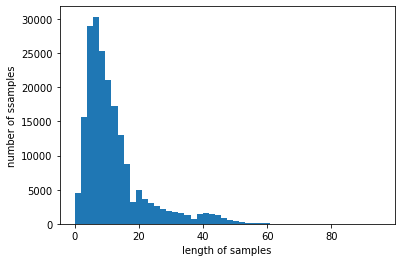

In [ ]:
# 리뷰의 길이 분포 확인
print('리뷰의 최대 길이 :', max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :', sum(map(len, tokenized_data))/len(tokenized_data))

plt.hist([len(s) for s in tokenized_data], bins = 50)
plt.xlabel('length of samples')
plt.ylabel('number of ssamples')
plt.show()

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [ ]:
model.wv.vectors.shape

(17532, 100)

In [ ]:
print(model.wv.most_similar('최민식'))

[('한석규', 0.8415213823318481), ('이정재', 0.8352338075637817), ('김명민', 0.8257290124893188), ('정재영', 0.823017954826355), ('전도연', 0.8206198215484619), ('송강호', 0.8203517198562622), ('이민호', 0.820081889629364), ('최민수', 0.8097188472747803), ('박중훈', 0.8094350099563599), ('김혜수', 0.8073678016662598)]


In [ ]:
print(model.wv.most_similar('히어로'))

[('슬래셔', 0.8891026973724365), ('무협', 0.8422173261642456), ('호러', 0.8389858603477478), ('느와르', 0.8324494361877441), ('SF', 0.8259473443031311), ('블록버스터', 0.8230069875717163), ('무비', 0.8091186881065369), ('물의', 0.8005276918411255), ('물', 0.7951886653900146), ('판타지', 0.7896460294723511)]


In [ ]:
print(model.wv.most_similar('뽀로로'))

[('보다야', 0.8380239009857178), ('말아톤', 0.8378210067749023), ('어린이날', 0.8375138640403748), ('바이크', 0.8367981314659119), ('훨배', 0.8354148864746094), ('생방', 0.8326592445373535), ('더파이팅', 0.8310490846633911), ('ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', 0.8307367563247681), ('먀', 0.8255918622016907), ('라디오스타', 0.8249134421348572)]


In [ ]:
print(model.wv.most_similar('색'))

[('쟁이', 0.6925719380378723), ('성향', 0.6923040151596069), ('히', 0.6870025396347046), ('무참', 0.6843907833099365), ('ㅅㅋ', 0.6777708530426025), ('동이', 0.6757420301437378), ('대가리', 0.674629807472229), ('아담', 0.671816349029541), ('우월', 0.6698955297470093), ('악마', 0.6686327457427979)]


# 사전 훈련된 워드 임베딩(한국어)

In [52]:
import gensim
model = gensim.models.Word2Vec.load('/content/drive/MyDrive/dataset/ko.bin')

In [54]:
del model

In [53]:
print(model)
# Word2Vec(vocab=30185, size=200, alpha=0.025) (vocab_size, 단어당 사이즈, )

Word2Vec(vocab=30185, size=200, alpha=0.025)


In [ ]:
result = model = model.wv.most_similar('강아지', topn = 50)
result

# 사전 훈련된 워드 임베딩 (영어)

In [78]:
import gensim
from gensim.models.keyedvectors import KeyedVectors
result = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [69]:
result

In [70]:
print(result.vectors.shape) # 300만개의 단어와 각단어의 차원이 300차원

(3000000, 300)


In [71]:
print(result.similarity('post','book'))

0.057204384


In [76]:
print(result['book'])# 300차원

[ 0.11279297 -0.02612305 -0.04492188  0.06982422  0.140625    0.03039551
 -0.04370117  0.24511719  0.08740234 -0.05053711  0.23144531 -0.07470703
  0.21875     0.03466797 -0.14550781  0.05761719  0.00671387 -0.00701904
  0.13183594 -0.25390625  0.14355469 -0.140625   -0.03564453 -0.21289062
 -0.24804688  0.04980469 -0.09082031  0.14453125  0.05712891 -0.10400391
 -0.19628906 -0.20507812 -0.27539062  0.03063965  0.20117188  0.17382812
  0.09130859 -0.10107422  0.22851562 -0.04077148  0.02709961 -0.00106049
  0.02709961  0.34179688 -0.13183594 -0.078125    0.02197266 -0.18847656
 -0.17480469 -0.05566406 -0.20898438  0.04858398 -0.07617188 -0.15625
 -0.05419922  0.01672363 -0.02722168 -0.11132812 -0.03588867 -0.18359375
  0.28710938  0.01757812  0.02185059 -0.05664062 -0.01251221  0.01708984
 -0.21777344 -0.06787109  0.04711914 -0.00668335  0.08544922 -0.02209473
  0.31835938  0.01794434 -0.02246094 -0.03051758 -0.09570312  0.24414062
  0.20507812  0.05419922  0.29101562  0.03637695  0.04

In [77]:
# gpu 병렬 -> 리눅스 사용
result

# Glove 훈련시키기

In [48]:
!pip install glove_python_binary

     |████████████████████████████████| 948 kB 5.3 MB/s 


In [49]:
from glove import Corpus, Glove

In [59]:
corpus = Corpus()

In [80]:
# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7f4c2f09fb10>)

In [81]:
import re
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

In [82]:
result

[['here',
  'are',
  'two',
  'reasons',
  'companies',
  'fail',
  'they',
  'only',
  'do',
  'more',
  'of',
  'the',
  'same',
  'or',
  'they',
  'only',
  'do',
  'what',
  's',
  'new'],
 ['to',
  'me',
  'the',
  'real',
  'real',
  'solution',
  'to',
  'quality',
  'growth',
  'is',
  'figuring',
  'out',
  'the',
  'balance',
  'between',
  'two',
  'activities',
  'exploration',
  'and',
  'exploitation'],
 ['both',
  'are',
  'necessary',
  'but',
  'it',
  'can',
  'be',
  'too',
  'much',
  'of',
  'a',
  'good',
  'thing'],
 ['consider', 'facit'],
 ['i', 'm', 'actually', 'old', 'enough', 'to', 'remember', 'them'],
 ['facit', 'was', 'a', 'fantastic', 'company'],
 ['they',
  'were',
  'born',
  'deep',
  'in',
  'the',
  'swedish',
  'forest',
  'and',
  'they',
  'made',
  'the',
  'best',
  'mechanical',
  'calculators',
  'in',
  'the',
  'world'],
 ['everybody', 'used', 'them'],
 ['and',
  'what',
  'did',
  'facit',
  'do',
  'when',
  'the',
  'electronic',
  'calcu

In [83]:
corpus.fit(result, window=5)
glove = Glove(no_components=100, learning_rate=0.05) # 훈련데이터로 부터 glove에 사용할 동시 행렬 생성

In [84]:
# 학습에 이용할 쓰레드 갯수는 4로 지정, 에포크는 20
glove.fit(corpus.matrix, epochs = 20, no_threads=4, verbo)

SyntaxError: ignored

In [ ]:
print(glove.most_similar('men'))

In [ ]:
print(glove.most_similar('boy'))

In [ ]:
print(glove.most_similar('university'))

# FastText

In [62]:
from gensim.models import FastText

In [63]:
model = FastText(result, size=100, window=5, min_count=5, workers=4, sg=1)

TypeError: ignored